# Data Tidying and Manipulation in R
## by Diya Das

### The goal
Data tidying is a necessary first step for data analysis - it's the process of taking your messily formatted data (missing values, unwieldy coding/organization, etc.) and literally tidying it up so it can be easily used for downstream analyses. To quote Hadley Wickham, "Tidy datasets are easy to manipulate, model and visualise, and have a specific structure:
each variable is a column, each observation is a row, and each type of observational unit
is a table."

These data are actually pretty tidy, so we're going to be focusing on cleaning and manipulation, but these manipulations will give you some idea of how to tidy untidy data.

### The datasets
We are going to be using the data from the R package [`nycflights13`](https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf). There are five datasets corresponding to flights departing NYC in 2013. We will load directly into R from the library, but the repository also includes CSV files we created for the purposes of the Python demo and can also be used to load the data into our R session.



*** If you've never run Jupyter notebooks with R, please run `conda install -c r r-essentials`

In [ ]:
install.packages("nycflights13")
install.packages("tidyr")
install.packages("dplyr") ## this is a package for some of the manipulations
install.packages("reshape")
install.packages("ggplot2")

In [1]:
library(nycflights13)
library(tidyr)
library(dplyr)
library(reshape)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths



## Reading data from a file
Let's read data from a file, though we won't be using it for this exercise.

## Inspecting a dataframe // What's in the `flights` dataset?
Let's run through an example using the `flights` dataset. This dataset includes...well what does it include? You could read the documentation, but let's take a look first.

In [2]:
data(flights)
flights <- data.frame(flights) ## dplyr has introduced a new data format that I am ignoring

message('What are the first 6 rows?')
print(head(flights))
message('What are the last 6 rows?')
print(tail(flights))

message('What does the `sample` function do?')
print(sample(1:6,2))

message('What happens when I use `sample` for indexing?')
print(flights[sample(1:nrow(flights),10),]) ## what is this doing?

What are the first 6 rows?


  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
3 2013     1   1      542            540         2      923            850
4 2013     1   1      544            545        -1     1004           1022
5 2013     1   1      554            600        -6      812            837
6 2013     1   1      554            558        -4      740            728
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
3        33      AA   1141  N619AA    JFK  MIA      160     1089    5     40
4       -18      B6    725  N804JB    JFK  BQN      183     1576    5     45
5       -25      DL    461  N668DN    LGA  ATL      116      762    6      0
6        12  

What are the last 6 rows?


       year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
336771 2013     9  30       NA           1842        NA       NA           2019
336772 2013     9  30       NA           1455        NA       NA           1634
336773 2013     9  30       NA           2200        NA       NA           2312
336774 2013     9  30       NA           1210        NA       NA           1330
336775 2013     9  30       NA           1159        NA       NA           1344
336776 2013     9  30       NA            840        NA       NA           1020
       arr_delay carrier flight tailnum origin dest air_time distance hour
336771        NA      EV   5274  N740EV    LGA  BNA       NA      764   18
336772        NA      9E   3393    <NA>    JFK  DCA       NA      213   14
336773        NA      9E   3525    <NA>    LGA  SYR       NA      198   22
336774        NA      MQ   3461  N535MQ    LGA  BNA       NA      764   12
336775        NA      MQ   3572  N511MQ    LGA  CLE       NA     

What does the `sample` function do?


[1] 6 4


What happens when I use `sample` for indexing?


       year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
197468 2013     5   5     1322           1325        -3     1423           1432
134462 2013     2  27      746            744         2     1053           1053
190743 2013     4  28      901            910        -9     1056           1110
222461 2013     6   1     1023           1030        -7     1146           1210
63181  2013    11   8     1842           1845        -3     2225           2210
297211 2013     8  19      811            803         8     1021           1016
65029  2013    11  11      628            630        -2      901            854
107912 2013    12  28      645            645         0      918            907
9595   2013     1  11     1845           1819        26     1959           1932
4022   2013     1   5     1454           1455        -1     1634           1628
       arr_delay carrier flight tailnum origin dest air_time distance hour
197468        -9      UA   1164  N34137    EW

## Identifying and removing NAs in a dataset
We noticed some NAs above (hopefully). How do you find them and remove observations for which there are NAs? 

In [3]:
message('What are the dimensions of the flights dataframe?\n')
print(dim(flights))

message('Are there any NAs in the flights dataframe?\n')
print(any(is.na(flights)))
print(all(is.na(flights)))

message('Selecting for flights where there is complete data, what are the dimensions?\n')
## complete.cases returns a logical vector indicating whether all observations in a row are not-NA.

flights_complete <- flights[complete.cases(flights),]
print(dim(flights_complete))

message('How might I obtain a summary of the original dataset?')
print(summary(flights))

What are the dimensions of the flights dataframe?



[1] 336776     19


Are there any NAs in the flights dataframe?



[1] TRUE
[1] FALSE


Selecting for flights where there is complete data, what are the dimensions?



[1] 327346     19


How might I obtain a summary of the original dataset?


      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

## Performing column-wise operations while grouping by other columns // Departure delay by airport of origin
Sometimes you may want to perform some aggregate function on data by category, which is encoded in another column. Here we calculate the statistics for departure delay, grouping by origin of the flight - remember this is the greater NYC area, so there are only three origins!

In [4]:
message('Using tapply...')
print(tapply(flights_complete$dep_delay, flights_complete$origin, summary))

message('That code is a bit messy, so using the with command for indicating the parent 
dataframe...')
print(with(flights_complete, 
           tapply(dep_delay, origin, summary)
          ))

message('Using dplyr...')
print(flights_complete %>% group_by(origin) %>% summarise(avg_dep_delay=mean(dep_delay)))

Using tapply...


$EWR
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -25.00   -4.00   -1.00   15.01   15.00 1126.00 

$JFK
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -43.00   -5.00   -1.00   12.02   10.00 1301.00 

$LGA
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -33.00   -6.00   -3.00   10.29    7.00  911.00 



That code is a bit messy, so using the with command for indicating the parent 
dataframe...


$EWR
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -25.00   -4.00   -1.00   15.01   15.00 1126.00 

$JFK
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -43.00   -5.00   -1.00   12.02   10.00 1301.00 

$LGA
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -33.00   -6.00   -3.00   10.29    7.00  911.00 



Using dplyr...


# A tibble: 3 × 2
  origin avg_dep_delay
   <chr>         <dbl>
1    EWR      15.00911
2    JFK      12.02361
3    LGA      10.28658


## Merge two tables by a single column // What are the most common destination airports?
The `flights` dataset has destination airports coded, as three-letter airport codes. I'm pretty good at decoding them, but you don't have to be. 

In [5]:
print(head(airports))

# A tibble: 6 × 8
    faa                           name      lat       lon   alt    tz   dst
  <chr>                          <chr>    <dbl>     <dbl> <int> <dbl> <chr>
1   04G              Lansdowne Airport 41.13047 -80.61958  1044    -5     A
2   06A  Moton Field Municipal Airport 32.46057 -85.68003   264    -6     A
3   06C            Schaumburg Regional 41.98934 -88.10124   801    -6     A
4   06N                Randall Airport 41.43191 -74.39156   523    -5     A
5   09J          Jekyll Island Airport 31.07447 -81.42778    11    -5     A
6   0A9 Elizabethton Municipal Airport 36.37122 -82.17342  1593    -5     A
# ... with 1 more variables: tzone <chr>


The `airports` table gives us a key! Let's merge the `flights` data with the `airports` data, using `dest` in `flights` and `faa` in `airports`.

In [8]:
message('This is pretty easy in base R...')
flights_readdest <- merge(flights_complete, airports, by.x='dest', by.y = 'faa', all.x=TRUE)
print(head(flights_readdest))

message('And you can do it in `dplyr` too...')
flights_readdest2 <- left_join(flights_complete, airports, by = c("dest" = "faa"))
print(head(flights_readdest2))

This is pretty easy in base R...


  dest year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1  ABQ 2013    11  17     1953           2000        -7     2250           2303
2  ABQ 2013     6  14     2016           2001        15     2244           2308
3  ABQ 2013     9   5     2029           2001        28     2244           2248
4  ABQ 2013    10  19     1950           1959        -9     2236           2246
5  ABQ 2013     9  23     2001           2001         0     2217           2248
6  ABQ 2013     5  22     2001           2001         0       20           2308
  arr_delay carrier flight tailnum origin air_time distance hour minute
1       -13      B6     65  N648JB    JFK      275     1826   20      0
2       -24      B6   1505  N506JB    JFK      239     1826   20      1
3        -4      B6     65  N644JB    JFK      232     1826   20      1
4       -10      B6     65  N635JB    JFK      262     1826   19     59
5       -31      B6     65  N708JB    JFK      240     1826   20      1
6       

And you can do it in `dplyr` too...


  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
3 2013     1   1      542            540         2      923            850
4 2013     1   1      544            545        -1     1004           1022
5 2013     1   1      554            600        -6      812            837
6 2013     1   1      554            558        -4      740            728
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
3        33      AA   1141  N619AA    JFK  MIA      160     1089    5     40
4       -18      B6    725  N804JB    JFK  BQN      183     1576    5     45
5       -25      DL    461  N668DN    LGA  ATL      116      762    6      0
6        12  

**Why did we use `all.x = TRUE` and `left_join`?**

In [9]:
print(setdiff(flights$dest, airports$faa))

[1] "BQN" "SJU" "STT" "PSE"


Well this merged dataset is nice, but do we really need all of this information?

In [10]:
print(colnames(flights_readdest))

 [1] "dest"           "year"           "month"          "day"           
 [5] "dep_time"       "sched_dep_time" "dep_delay"      "arr_time"      
 [9] "sched_arr_time" "arr_delay"      "carrier"        "flight"        
[13] "tailnum"        "origin"         "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"      "name"          
[21] "lat"            "lon"            "alt"            "tz"            
[25] "dst"            "tzone"         


In [11]:
flights_sm <- select(flights_readdest,origin, dest=name, year, month, day, air_time)
print(head(flights_sm))

  origin                              dest year month day air_time
1    JFK Albuquerque International Sunport 2013    11  17      275
2    JFK Albuquerque International Sunport 2013     6  14      239
3    JFK Albuquerque International Sunport 2013     9   5      232
4    JFK Albuquerque International Sunport 2013    10  19      262
5    JFK Albuquerque International Sunport 2013     9  23      240
6    JFK Albuquerque International Sunport 2013     5  22      260


Why would you want to ever use `select`? `dplyr` lets you chain operations. Let's calculate the average air time for various flight paths, using origin and the readable version of destination airport.

In [12]:
airtime <- left_join(flights_complete, airports, by = c("dest" = "faa")) %>% 
select(origin, dest=name, air_time) %>% 
group_by(origin, dest) %>% 
summarize(avg_air_time = mean(air_time))

print(head(airtime))
print(dim(airtime))

Source: local data frame [6 x 3]
Groups: origin [1]

  origin                       dest avg_air_time
   <chr>                      <chr>        <dbl>
1    EWR                Albany Intl     31.78708
2    EWR Asheville Regional Airport     89.79681
3    EWR      Austin Bergstrom Intl    211.24765
4    EWR  Baltimore Washington Intl     37.16412
5    EWR               Bradley Intl     25.46602
6    EWR       Buffalo Niagara Intl     51.15385
[1] 218   3


What's the longest flight from each airport, on average?

In [13]:
with(airtime, tapply(avg_air_time,origin,  max))

EWR      JFK      LGA 
612.0752 623.0877 227.5160

## Pivot Table // Average flight time from origin to destination

Let's put destinations in rows and origins in columns, and have `air_time` as values.

In [14]:
pvt_airtime <- spread(airtime, origin, avg_air_time)
summary(apply(pvt_airtime, 1, function(x) all(is.na(x))))
print(pvt_airtime)

   Mode   FALSE    NA's 
logical     101       0 

# A tibble: 101 × 4
                                dest       EWR       JFK       LGA
*                              <chr>     <dbl>     <dbl>     <dbl>
1      Akron Canton Regional Airport        NA        NA  64.03682
2                        Albany Intl  31.78708        NA        NA
3  Albuquerque International Sunport        NA 249.16929        NA
4         Asheville Regional Airport  89.79681        NA  92.20000
5              Austin Bergstrom Intl 211.24765 213.70220        NA
6          Baltimore Washington Intl  37.16412  39.08362  40.46667
7                        Bangor Intl        NA        NA  54.11732
8                    Birmingham Intl        NA 117.00000 122.79851
9                         Blue Grass        NA        NA  90.00000
10                          Bob Hope        NA 334.10270        NA
# ... with 91 more rows


## Multi-column merge // What's the weather like for departing flights?
Flights...get delayed. What's the first step if you want to know if the departing airport's weather is at all responsible for the delay? Luckily, we have a `weather` dataset for that.

Let's take a look.

In [15]:
head(weather)
print(intersect(colnames(flights_complete), colnames(weather)))

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
EWR,2013,1,1,0,37.04,21.92,53.97,230,10.35702,11.91865,0,1013.9,10,2012-12-31 16:00:00
EWR,2013,1,1,1,37.04,21.92,53.97,230,13.80936,15.89154,0,1013.0,10,2012-12-31 17:00:00
EWR,2013,1,1,2,37.94,21.92,52.09,230,12.65858,14.56724,0,1012.6,10,2012-12-31 18:00:00
EWR,2013,1,1,3,37.94,23.00,54.51,230,13.80936,15.89154,0,1012.7,10,2012-12-31 19:00:00
EWR,2013,1,1,4,37.94,24.08,57.04,240,14.96014,17.21583,0,1012.8,10,2012-12-31 20:00:00
EWR,2013,1,1,6,39.02,26.06,59.37,270,10.35702,11.91865,0,1012.0,10,2012-12-31 22:00:00


[1] "year"      "month"     "day"       "origin"    "hour"      "time_hour"


In [16]:
flights_weather <- merge(flights_complete, weather, 
                         by=c("year", "month","day","hour", "origin"))
print(dim(flights_complete))
print(dim(flights_weather))


[1] 327346     19
[1] 326160     29


In [17]:
flights_weather_posdelays <- filter(flights_weather, dep_delay>200)
print(dim(flights_weather_posdelays))

[1] 2811   29


## Arranging a dataframe // What's the weather like for the most and least delayed flights?

Let's sort the `flights_weather` dataframe on `dep_delay` and get the top 10 values.

In [18]:
flights_weather %>% arrange(desc(dep_delay)) %>% head(10)

year,month,day,hour,origin,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y
2013,1,9,9,JFK,641,900,1301,1242,1530,⋯,35.06,33.08,92.40,0,0.00000,0.000000,0,1028.6,9,2013-01-09 01:00:00
2013,6,15,19,JFK,1432,1935,1137,1607,2120,⋯,78.08,50.00,37.38,220,10.35702,11.918651,0,1013.8,10,2013-06-15 11:00:00
2013,1,10,16,EWR,1121,1635,1126,1239,1810,⋯,46.94,21.92,36.85,330,13.80936,15.891535,0,1032.0,10,2013-01-10 08:00:00
2013,9,20,18,JFK,1139,1845,1014,1457,2210,⋯,73.94,53.96,49.66,180,12.65858,14.567241,0,1017.7,10,2013-09-20 10:00:00
2013,7,22,16,JFK,845,1600,1005,1044,1815,⋯,84.92,71.96,65.23,120,10.35702,11.918651,0,1013.7,10,2013-07-22 08:00:00
2013,4,10,19,JFK,1100,1900,960,1342,2211,⋯,60.08,46.04,59.72,140,17.26170,19.864419,0,1012.8,10,2013-04-10 11:00:00
2013,3,17,8,LGA,2321,810,911,135,1020,⋯,33.08,23.00,66.11,320,12.65858,14.567241,0,1014.9,10,2013-03-17 01:00:00
2013,6,27,19,JFK,959,1900,899,1236,2226,⋯,80.60,71.60,74.11,170,9.20624,10.594357,0,NA,9,2013-06-27 11:00:00
2013,7,22,7,LGA,2257,759,898,121,1026,⋯,75.92,69.98,81.85,60,6.90468,7.945768,0,1013.5,10,2013-07-21 23:00:00
2013,12,5,17,EWR,756,1700,896,1058,2020,⋯,55.40,53.60,93.65,0,0.00000,0.000000,0,NA,2,2013-12-05 09:00:00


In [19]:
flights_weather %>% arrange(dep_delay) %>% head(10)

year,month,day,hour,origin,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y
2013,12,7,21,JFK,2040,2123,-43,40,2352,⋯,37.94,17.96,44.00,320,10.35702,11.918651,0,1028.6,10,2013-12-07 13:00:00
2013,2,3,20,LGA,2022,2055,-33,2240,2338,⋯,30.20,17.60,59.01,320,6.90468,7.945768,0,NA,10,2013-02-03 12:00:00
2013,11,10,14,LGA,1408,1440,-32,1549,1559,⋯,53.96,30.02,39.72,260,12.65858,14.567241,0,1011.5,10,2013-11-10 06:00:00
2013,1,11,19,LGA,1900,1930,-30,2233,2243,⋯,39.92,33.08,76.32,60,9.20624,10.594357,0,1026.2,10,2013-01-11 11:00:00
2013,1,29,17,LGA,1703,1730,-27,1947,1957,⋯,39.02,33.98,81.95,60,11.50780,13.242946,0,1019.9,5,2013-01-29 09:00:00
2013,8,9,7,LGA,729,755,-26,1002,955,⋯,73.94,71.06,90.73,170,9.20624,10.594357,0,1014.6,10,2013-08-08 23:00:00
2013,10,23,19,EWR,1907,1932,-25,2143,2143,⋯,55.94,33.08,41.82,NA,3.45234,3.972884,0,1003.2,10,2013-10-23 11:00:00
2013,3,30,20,LGA,2030,2055,-25,2213,2250,⋯,55.94,17.96,22.32,300,9.20624,10.594357,0,1017.9,10,2013-03-30 13:00:00
2013,3,2,14,JFK,1431,1455,-24,1601,1631,⋯,39.02,21.02,48.07,340,12.65858,14.567241,0,1008.0,10,2013-03-02 06:00:00
2013,5,14,9,LGA,914,938,-24,1143,1204,⋯,44.96,32.00,60.20,310,13.80936,15.891535,0,1019.3,10,2013-05-14 01:00:00


## Some other tidying
## Capitalization issues.

In [20]:
print(head(tolower(flights_complete$dest)))
print(head(toupper(tolower(flights_complete$dest))))

[1] "iah" "iah" "mia" "bqn" "atl" "ord"
[1] "IAH" "IAH" "MIA" "BQN" "ATL" "ORD"


## Wide to long formatted data

In [22]:
print(head(flights_complete))

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
3 2013     1   1      542            540         2      923            850
4 2013     1   1      544            545        -1     1004           1022
5 2013     1   1      554            600        -6      812            837
6 2013     1   1      554            558        -4      740            728
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
3        33      AA   1141  N619AA    JFK  MIA      160     1089    5     40
4       -18      B6    725  N804JB    JFK  BQN      183     1576    5     45
5       -25      DL    461  N668DN    LGA  ATL      116      762    6      0
6        12  

Using `reshape`


            time_hour type_of_delay value
1 2013-01-01 05:00:00     dep_delay     2
2 2013-01-01 05:00:00     dep_delay     4
3 2013-01-01 05:00:00     dep_delay     2
4 2013-01-01 05:00:00     dep_delay    -1
5 2013-01-01 06:00:00     dep_delay    -6
6 2013-01-01 05:00:00     dep_delay    -4


Using `tidyr`


  year month day dep_time sched_dep_time arr_time sched_arr_time carrier flight
1 2013     1   1      517            515      830            819      UA   1545
2 2013     1   1      533            529      850            830      UA   1714
3 2013     1   1      542            540      923            850      AA   1141
4 2013     1   1      544            545     1004           1022      B6    725
5 2013     1   1      554            600      812            837      DL    461
6 2013     1   1      554            558      740            728      UA   1696
  tailnum origin dest air_time distance hour minute           time_hour
1  N14228    EWR  IAH      227     1400    5     15 2013-01-01 05:00:00
2  N24211    LGA  IAH      227     1416    5     29 2013-01-01 05:00:00
3  N619AA    JFK  MIA      160     1089    5     40 2013-01-01 05:00:00
4  N804JB    JFK  BQN      183     1576    5     45 2013-01-01 05:00:00
5  N668DN    LGA  ATL      116      762    6      0 2013-01-01 06:00:00
6  N3946

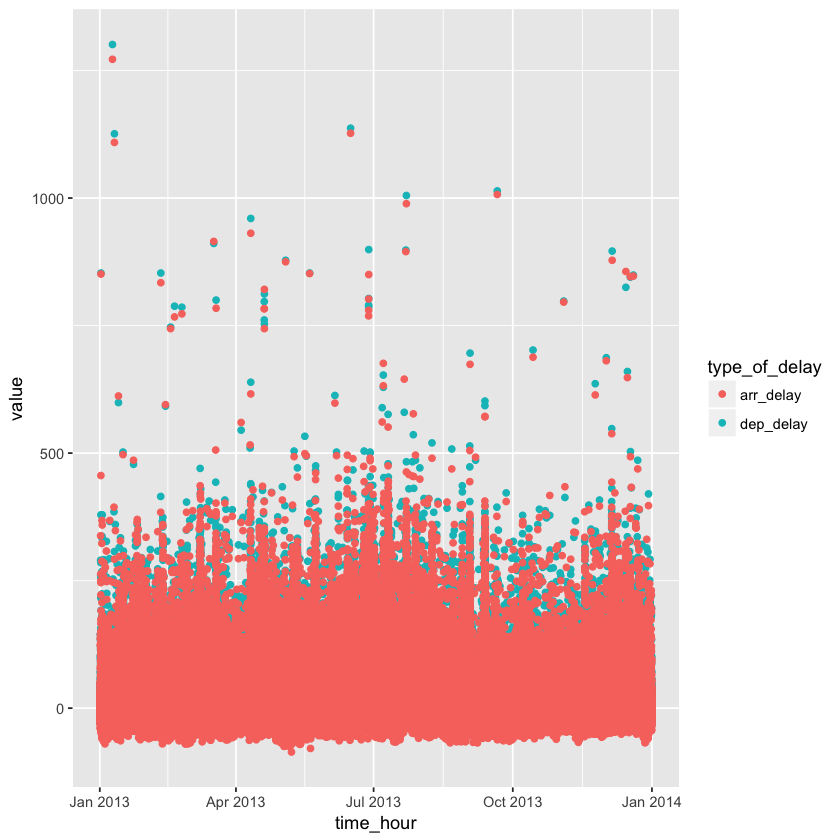

In [29]:
message('Using `reshape`')
day_delay <- melt(flights_complete, id.vars=c("time_hour"), 
                measure.vars=c("dep_delay","arr_delay"), variable_name = "type_of_delay")
print(head(day_delay))
message('Using `tidyr`')
day_delay <- gather(flights_complete, `dep_delay`,`arr_delay`, 
                    key = "type_of_delay", value="value")
print(head(day_delay))
ggplot(day_delay,aes(x=time_hour,y=value,colour=type_of_delay, group=type_of_delay)) + geom_point()

Well this is a bit hard to read. What about the first entry for each type of delay in each hour? 

## Removing duplicates

  year month day dep_time sched_dep_time arr_time sched_arr_time carrier flight
1 2013     1   1      517            515      830            819      UA   1545
2 2013     1   1      554            600      812            837      DL    461
3 2013     1   1      653            700      936           1009      DL   1383
4 2013     1   1      758            800     1053           1054      B6    517
5 2013     1   1      848           1835     1001           1950      MQ   3944
6 2013     1   1      856            900     1226           1220      AA      1
  tailnum origin dest air_time distance hour minute           time_hour
1  N14228    EWR  IAH      227     1400    5     15 2013-01-01 05:00:00
2  N668DN    LGA  ATL      116      762    6      0 2013-01-01 06:00:00
3  N327NW    LGA  PBI      149     1035    7      0 2013-01-01 07:00:00
4  N645JB    EWR  MCO      142      937    8      0 2013-01-01 08:00:00
5  N942MQ    JFK  BWI       41      184   18     35 2013-01-01 18:00:00
6  N324A

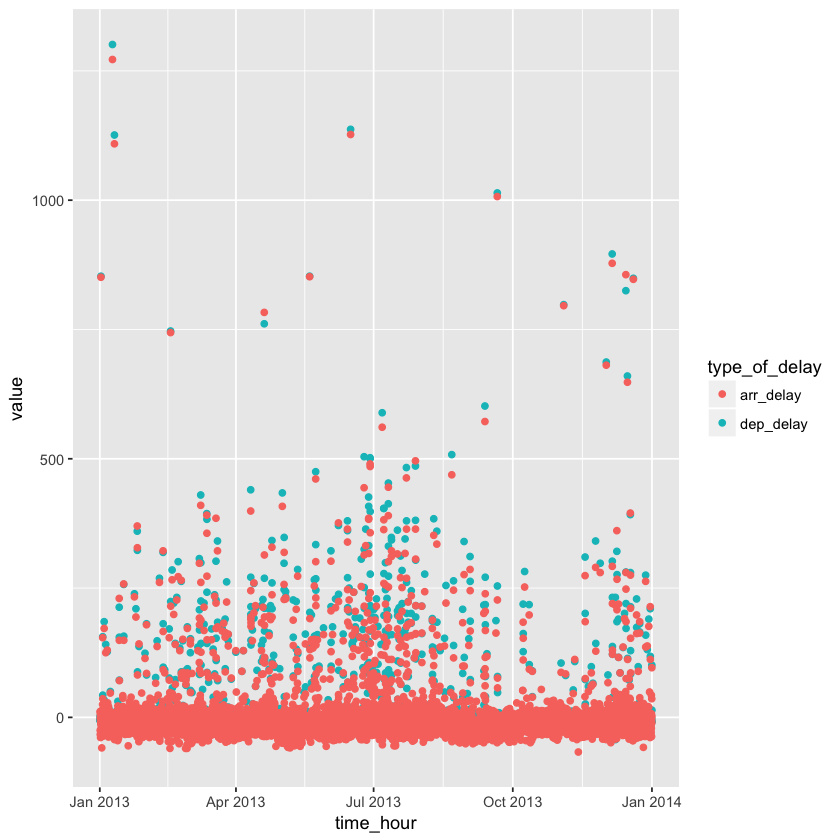

In [30]:
day_delay_first <- distinct(day_delay, time_hour, type_of_delay, .keep_all = TRUE)
print(head(day_delay_first))
ggplot(day_delay_first,aes(x=time_hour,y=value,colour=type_of_delay, group=type_of_delay)) + geom_point()

### An incomplete investigation of NAs 

Let's examine where there are NAs in the `flights` dataset.

In [31]:
ind <- which(is.na(flights), arr.ind = TRUE)
print(head(ind))
ind2 <- table(ind[,2])
print(ind2)
names(ind2) <- colnames(flights)[as.numeric(names(ind2))]
print(ind2)

      row col
[1,]  839   4
[2,]  840   4
[3,]  841   4
[4,]  842   4
[5,] 1778   4
[6,] 1779   4

   4    6    7    9   12   15 
8255 8255 8713 9430 2512 9430 
 dep_time dep_delay  arr_time arr_delay   tailnum  air_time 
     8255      8255      8713      9430      2512      9430 


In [32]:
flights_incomplete <- flights[!complete.cases(flights),]
print(dim(flights_incomplete))

[1] 9430   19


Do flights with NA departure time also have an NA departure delay?

In [35]:
print(table(is.na(flights_incomplete$dep_time) & is.na(flights_incomplete$dep_delay)))
print(table(is.na(flights_incomplete$dep_time) | is.na(flights_incomplete$dep_delay)))


FALSE  TRUE 
 1175  8255 

FALSE  TRUE 
 1175  8255 


Yes.